# Data Mining Assignment 2_NN

## Student Details

Student Name and ID of the member submitting the assignment: 

Student Name and ID of the remaining members: 

Notes:
When submitting, fill your name and ID in this cell. Note that this is a markdown cell!<br>
Do not make any changes in the dataset file and do not rename the 'database.csv'.
<br> Rename your submission file to <b> 'yourLastName_Last4digitsofyourID_PA1.ipynb' </b>. 
<br> Do not to forget to cite any external sources used by you. 
**10 points per question will be deducted incase you fail to do so**
<br>**DO NOT DELETE THIS CELL**<br>
#### Please consult the TA before using any other packages apart from sklearn,numpy,pandas, matplotlib and seaborn

## Programming Assignment Submission Instructions (2 Points)

Step 1: Rename this submission file as 'yourLastName_Last4digitsofyourID_DT.ipynb' [1 point]

Step 2: Place this file inside the folder 'PA#2_Classification_yourLastName'  [1 point]

## Programming Assignment Details (25 Points)

For this assignment use Jupyter notebook, Panda, and scikit.

 * Load pima-indians-diabetes dataset from sklearn datasets. Output/prediction variable is 'class'[1 points]
 * while selecting best 3 attributes for training,validating and testing your model. [2 points]
 * Find the best K. [3 points]
 * Split your dataset - 60% for training set, 20% for Validation set and 20% for testing set the classifier. Use random state as 2022 [2 points]
 * Use minkowski distance.[1 points]
 * Test the classifier with three different numbers for neighbors and record the results for training, validation and testing. Show the best one.[3 points]
 * Use comments to explain your code and variable names.[4 points]
 * Calculate and print the confusion matrix, and the classification Report (includes:precision, recall, f1-score, and support) for all three different numbers.[6 points]
 * Plot the classifier in a 2D projection.[3 points]

## Report (23 Points)

For each classification task you need to submit a report (Microsoft Word, or PDF) that you have to:
* Explain all the preprocessing done in detail.[4 points]
* Explain all the parameters of KNN in details in your own words. Do not copy paste. Give references. 10 Points will be deducted if you copy paste from the internet. [5 points]
* Explain what was your criteria for selecting the three attributes. [5 points]
* Visualizations of the classifier in a 2D projection, and write your observations. [4 points]
* Interprete and compare the results explain in details.[5 points]

Do not to forget to cite your sources!

In [35]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
# from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix,classification_report #To import confusion matrix and report 
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap


In [37]:
from numpy import loadtxt
from sklearn import preprocessing

In [10]:
#1. Load pima-indians-diabetes dataset from sklearn datasets. Output/prediction variable is 'class'
df_data = pd.read_csv('pima-indians-diabetes.csv', encoding='latin1')

In [136]:
print(df_data['class'].to_csv(index=False))

class
1
0
1
0
1
0
1
0
1
1
0
1
0
1
1
1
1
1
0
1
0
0
1
1
1
1
1
0
0
0
0
1
0
0
0
0
0
1
1
1
0
0
0
1
0
1
0
0
1
0
0
0
0
1
0
0
1
0
0
0
0
1
0
0
1
0
1
0
0
0
1
0
1
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
1
0
0
0
0
1
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
1
1
1
0
0
1
1
1
0
0
0
1
0
0
0
1
1
0
0
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
1
1
0
0
0
1
0
0
0
0
1
1
0
0
0
0
1
1
0
0
0
1
0
1
0
1
0
0
0
0
0
1
1
1
1
1
0
0
1
1
0
1
0
1
1
1
0
0
0
0
0
0
1
1
0
1
0
0
0
1
1
1
1
0
1
1
1
1
0
0
0
0
0
1
0
0
1
1
0
0
0
1
1
1
1
0
0
0
1
1
0
1
0
0
0
0
0
0
0
0
1
1
0
0
0
1
0
1
0
0
1
0
1
0
0
1
1
0
0
0
0
0
1
0
0
0
1
0
0
1
1
0
0
1
0
0
0
1
1
1
0
0
1
0
1
0
1
1
0
1
0
0
1
0
1
1
0
0
1
0
1
0
0
1
0
1
0
1
1
1
0
0
1
0
1
0
0
0
1
0
0
0
0
1
1
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
1
1
0
1
1
0
0
1
0
0
1
0
0
1
1
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
1
1
1
0
0
1
0
0
1
0
0
1
0
1
1
0
1
0
1
0
1
0
1
1
0
0
0
0
1
1
0
1
0
1
0
0
0
0
1
1
0
1
0
1
0
0
0
0
0
1
0
0
0
0
1
0
0
1
1
1
0
0
1
0
0
1
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
1
1
0
0
0
0
0
0
0
1
0
0
0


In [38]:
scaler = preprocessing.StandardScaler()
scaler.fit(df_data.drop('class', axis=1))
scaled_features = scaler.transform(df_data.drop('class', axis=1))
scaled_data = pd.DataFrame(scaled_features, columns = df_data.drop('class', axis=1).columns)

In [16]:
x = scaled_data
y = df_data['class']

In [40]:
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.6,random_state = 2022) #Splitting dataset 60% for training, 20 for validation and 20% for testing the classifier. Use random state as 2022
X_valid, X_test, y_valid, y_test = train_test_split(X_test,y_test, test_size=0.5, random_state = 2022)

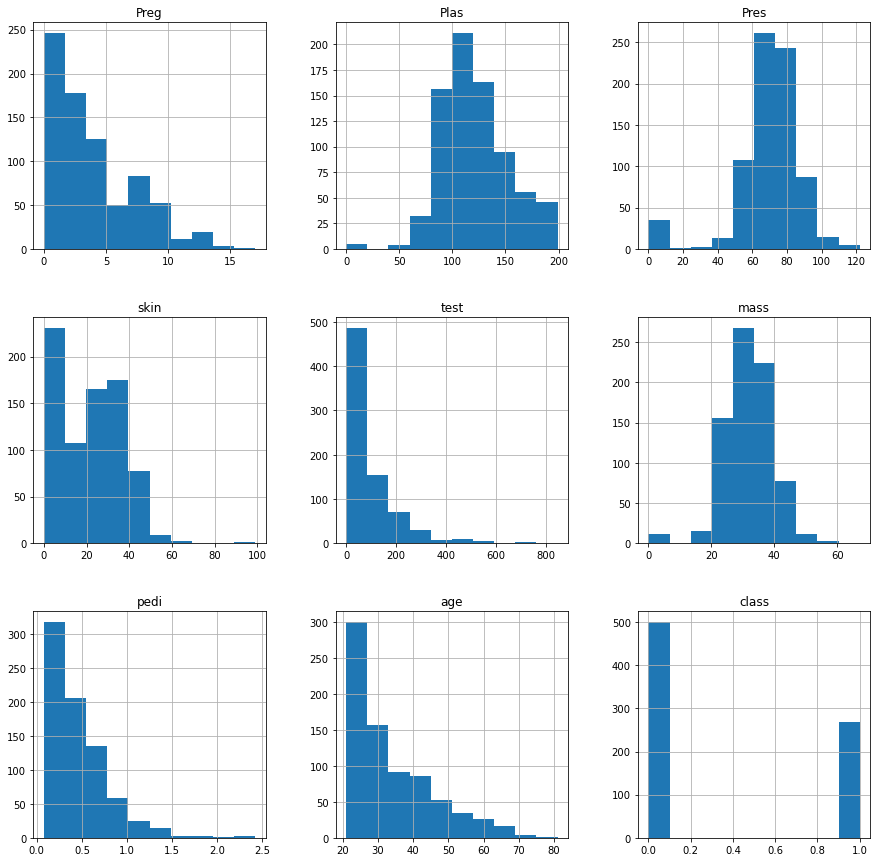

In [41]:
pd.DataFrame.hist(df_data, figsize = [15,15]);

In [42]:
X_train=pd.DataFrame(X_train) #converting X_train array into dataframe
X_train.columns
X_test=pd.DataFrame(X_test) #converting X_train array into dataframe
X_test.columns
X_valid=pd.DataFrame(X_valid) #converting X_train array into dataframe
X_valid.columns

Index(['Preg', 'Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age'], dtype='object')

In [43]:
X_train=X_train[['skin', 'test', 'mass']]
X_test=X_test[['skin', 'test', 'mass']]
X_valid=X_valid[['skin', 'test', 'mass']]

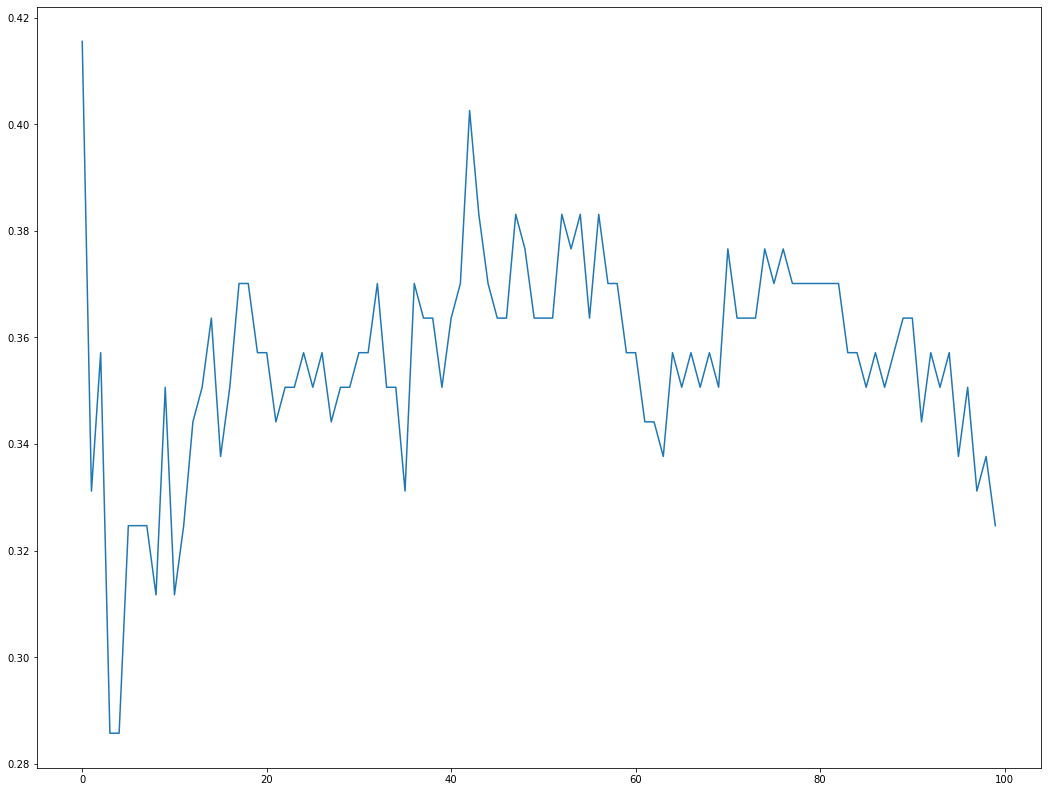

In [49]:
#Selecting an optimal K value

error_rates = []

for i in np.arange(1, 101):

    new_model = KNeighborsClassifier(n_neighbors = i)

    new_model.fit(X_train, y_train)

    new_predictions = new_model.predict(X_test)

    error_rates.append(np.mean(new_predictions != y_test))

plt.figure(figsize=(18,14))

plt.plot(error_rates)

k-NN accuracy for testing set: 0.642857
k-NN score for training set: 0.817391
Accuracy: 0.6428571428571429

Confusion Matrix:
 [[77 29]
 [26 22]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.73      0.74       106
           1       0.43      0.46      0.44        48

    accuracy                           0.64       154
   macro avg       0.59      0.59      0.59       154
weighted avg       0.65      0.64      0.65       154



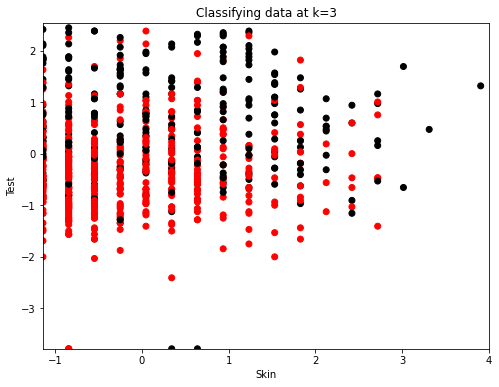

In [48]:
#Train the model and make predictions
model = KNeighborsClassifier(n_neighbors = 3,metric='minkowski') #creating model classifier for n=3
knn_model=model.fit(X_train, y_train) #training the model using training set
print('k-NN accuracy for testing set: %f' % knn_model.score(X_test, y_test))
print('k-NN score for training set: %f' % knn_model.score(X_train, y_train))
predictions = model.predict(X_test) 

#Performance measurement
print("Accuracy:",metrics.accuracy_score(y_test, predictions)) #predict the accuracy using test dataset
print("\nConfusion Matrix:\n",confusion_matrix(y_test, predictions)) #Printing confusion matrix
print("\nClassification Report:\n",classification_report(y_test, predictions)) #Printing classification report 

#Plot the decision boundary i.e; min max which are used for limitting
# x_min, x_max = X[:, 0,0].min() - 1, X[:, 0,1].max() + 1
x_maximum = x.iloc[:,0].max()+.1  #calculating and assigning the maximum value of sepal length
x_minimum = x.iloc[:, 0].min()  #calculating and assigning the minimun value of sepal length
y_maximum =x.iloc[:, 1].max() +.1 #calculating and assigning the maximum value of sepal width
y_minimum = x.iloc[:, 1].min()  #calculating and assigning the minimun value of sepal width

#returns coordinate matrices mesh for the decision boundary
xcor, ycor = np.meshgrid(np.linspace(x_minimum, x_maximum, 200),
                        np.linspace(y_minimum, y_maximum, 200))

#assigning few colors for background color and observed values
background_color=ListedColormap(["pink","lightskyblue","grey"])
observation_color= ListedColormap (["red", "blue", "black"])

#reshaping the mesh grid matrix
# Z = model.predict([xcor.ravel(), ycor.ravel()])
Z = np.reshape(xcor.shape[0],1)
# Z = np.reshape(ycor.shape[0],1)

#Plotting figure
plt.figure(figsize=(8, 6))

#plotting different colors in 2d 
# plt.pcolormesh(xcor, ycor, Z,cmap=background_color)
# plt.pcolormesh(Z)

#assigning scatter plot with sepal length , sepal width and target variable 
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y,cmap=observation_color)

# plotting the limits of x and y axis
plt.xlim(xcor.min(), xcor.max())
plt.ylim(ycor.min(), ycor.max())

#displaying the scatter plot
plt.title("Classifying data at k=3")
plt.xlabel("Skin")
plt.ylabel("Test")
plt.show()

k-NN accuracy for testing set: 0.675325
k-NN score for training set: 0.721739
Accuracy: 0.6753246753246753

Confusion Matrix:
 [[94 12]
 [38 10]]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.89      0.79       106
           1       0.45      0.21      0.29        48

    accuracy                           0.68       154
   macro avg       0.58      0.55      0.54       154
weighted avg       0.63      0.68      0.63       154



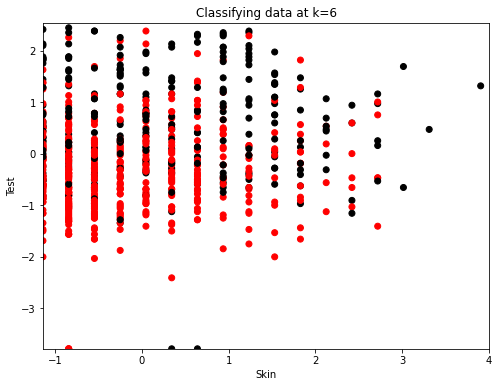

In [46]:
#Train the model and make predictions
model = KNeighborsClassifier(n_neighbors = 6,metric='minkowski') #creating model classifier for n=6
knn_model=model.fit(X_train, y_train) #training the model using training set
print('k-NN accuracy for testing set: %f' % knn_model.score(X_test, y_test))
print('k-NN score for training set: %f' % knn_model.score(X_train, y_train))
predictions = model.predict(X_test) 

#Performance measurement
print("Accuracy:",metrics.accuracy_score(y_test, predictions)) #predict the accuracy using test dataset
print("\nConfusion Matrix:\n",confusion_matrix(y_test, predictions)) #Printing confusion matrix
print("\nClassification Report:\n",classification_report(y_test, predictions)) #Printing classification report 

#Plot the decision boundary i.e; min max which are used for limitting
# x_min, x_max = X[:, 0,0].min() - 1, X[:, 0,1].max() + 1
x_maximum = x.iloc[:,0].max()+.1  #calculating and assigning the maximum value of sepal length
x_minimum = x.iloc[:, 0].min()  #calculating and assigning the minimun value of sepal length
y_maximum =x.iloc[:, 1].max() +.1 #calculating and assigning the maximum value of sepal width
y_minimum = x.iloc[:, 1].min()  #calculating and assigning the minimun value of sepal width

#returns coordinate matrices mesh for the decision boundary
xcor, ycor = np.meshgrid(np.linspace(x_minimum, x_maximum, 200),
                        np.linspace(y_minimum, y_maximum, 200))

#assigning few colors for background color and observed values
background_color=ListedColormap(["pink","lightskyblue","grey"])
observation_color= ListedColormap (["red", "blue", "black"])

#reshaping the mesh grid matrix
# Z = model.predict([xcor.ravel(), ycor.ravel()])
Z = np.reshape(xcor.shape[0],1)
# Z = np.reshape(ycor.shape[0],1)

#Plotting figure
plt.figure(figsize=(8, 6))

#plotting different colors in 2d 
# plt.pcolormesh(xcor, ycor, Z,cmap=background_color)
# plt.pcolormesh(Z)

#assigning scatter plot with sepal length , sepal width and target variable 
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y,cmap=observation_color)

# plotting the limits of x and y axis
plt.xlim(xcor.min(), xcor.max())
plt.ylim(ycor.min(), ycor.max())

#displaying the scatter plot
plt.title("Classifying data at k=6")
plt.xlabel("Skin")
plt.ylabel("Test")
plt.show()

k-NN accuracy for testing set: 0.688312
k-NN score for training set: 0.717391
Accuracy: 0.6883116883116883

Confusion Matrix:
 [[84 22]
 [26 22]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.79      0.78       106
           1       0.50      0.46      0.48        48

    accuracy                           0.69       154
   macro avg       0.63      0.63      0.63       154
weighted avg       0.68      0.69      0.68       154



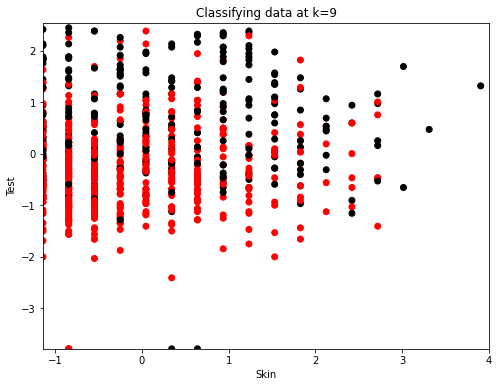

In [47]:
#Train the model and make predictions
model = KNeighborsClassifier(n_neighbors = 9,metric='minkowski') #creating model classifier for n=9
knn_model=model.fit(X_train, y_train) #training the model using training set
print('k-NN accuracy for testing set: %f' % knn_model.score(X_test, y_test))
print('k-NN score for training set: %f' % knn_model.score(X_train, y_train))
predictions = model.predict(X_test) 

#Performance measurement
print("Accuracy:",metrics.accuracy_score(y_test, predictions)) #predict the accuracy using test dataset
print("\nConfusion Matrix:\n",confusion_matrix(y_test, predictions)) #Printing confusion matrix
print("\nClassification Report:\n",classification_report(y_test, predictions)) #Printing classification report 

#Plot the decision boundary i.e; min max which are used for limitting
# x_min, x_max = X[:, 0,0].min() - 1, X[:, 0,1].max() + 1
x_maximum = x.iloc[:,0].max()+.1  #calculating and assigning the maximum value of sepal length
x_minimum = x.iloc[:, 0].min()  #calculating and assigning the minimun value of sepal length
y_maximum =x.iloc[:, 1].max() +.1 #calculating and assigning the maximum value of sepal width
y_minimum = x.iloc[:, 1].min()  #calculating and assigning the minimun value of sepal width

#returns coordinate matrices mesh for the decision boundary
xcor, ycor = np.meshgrid(np.linspace(x_minimum, x_maximum, 200),
                        np.linspace(y_minimum, y_maximum, 200))

#assigning few colors for background color and observed values
background_color=ListedColormap(["pink","lightskyblue","grey"])
observation_color= ListedColormap (["red", "blue", "black"])

#reshaping the mesh grid matrix
# Z = model.predict([xcor.ravel(), ycor.ravel()])
Z = np.reshape(xcor.shape[0],1)
# Z = np.reshape(ycor.shape[0],1)

#Plotting figure
plt.figure(figsize=(8, 6))

#plotting different colors in 2d 
# plt.pcolormesh(xcor, ycor, Z,cmap=background_color)
# plt.pcolormesh(Z)

#assigning scatter plot with sepal length , sepal width and target variable 
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y,cmap=observation_color)

# plotting the limits of x and y axis
plt.xlim(xcor.min(), xcor.max())
plt.ylim(ycor.min(), ycor.max())

#displaying the scatter plot
plt.title("Classifying data at k=9")
plt.xlabel("Skin")
plt.ylabel("Test")
plt.show()

In [ ]:
External Sources:
    
https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html

https://www.geeksforgeeks.org/project-knn-classifying-iris-dataset/

https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/

https://www.ritchieng.com/machine-learning-k-nearest-neighbors-knn/